<a href="https://colab.research.google.com/github/Analyst-E/The-Impact-of-In-app-ads-on-Customer-Experience/blob/main/Academic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IMPORT THE NECESSARY LIBRARIES**

In [1]:
# Import Libraries
import pandas as pd             # Data manipulation (Core)
import numpy as np              # Numerical operations (Core)
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # Advanced statistical visualization
import scipy.stats as stats     # Statistical tests
import statsmodels.api as sm    # General statistical models (e.g., OLS)
from statsmodels.formula.api import ols  # Regression/ANOVA with formula syntax
from sklearn.preprocessing import StandardScaler # Data scaling
from sklearn.cluster import KMeans               # Clustering (Exploratory)

In [2]:
# install the library necessary for cronbach alpha calculation
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.1 MB/s eta 0:00:00


In [4]:
import pingouin as pg;

# Load the dataset
df = pd.read_csv('In_App_Ads_Survey.csv')

In [5]:
# Basic exploration
print("\nColumn information:")
print(df.info())


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age_Code               168 non-null    int64  
 1   is_gamer               168 non-null    int64  
 2   is_social_media_user   168 non-null    int64  
 3   is_shopper             168 non-null    int64  
 4   is_news                168 non-null    int64  
 5   is_utility             168 non-null    int64  
 6   is_streamer            168 non-null    int64  
 7   is_productivity        168 non-null    int64  
 8   Banner_Ads             168 non-null    int64  
 9   Pop_up_Ads             168 non-null    int64  
 10  Rewarded_Ads           168 non-null    int64  
 11  Satisfaction_Pop_up    168 non-null    int64  
 12  Satisfaction_Banner    168 non-null    int64  
 13  Satisfaction_Rewarded  168 non-null    int64  
 14  Engagement_Pop_up      168 non-null  

# **2. RELIABILITY TESTS**

In [8]:
# --- Reliability Check ---

# 1. Satisfaction Scale Reliability (Q12, Q13, Q14)
satisfaction_cols = ['Satisfaction_Pop_up', 'Satisfaction_Banner', 'Satisfaction_Rewarded']
alpha_satisfaction = pg.cronbach_alpha(data=df[satisfaction_cols])

# 2. Engagement Scale Reliability (Q15, Q16, Q17)
engagement_cols = ['Engagement_Pop_up', 'Engagement_Rewarded', 'Engagement_Relevant']
alpha_engagement = pg.cronbach_alpha(data=df[engagement_cols])

print("--- Cronbach's Alpha Results ---")
print(f"User Satisfaction Scale Alpha: {alpha_satisfaction[0]:.3f}")
print(f"App Engagement Scale Alpha: {alpha_engagement[0]:.3f}")

# Interpretation: A value >= 0.70 is typically required for good reliability.

--- Cronbach's Alpha Results ---
User Satisfaction Scale Alpha: 0.693
App Engagement Scale Alpha: 0.444


**Locating Problematic items**

In [13]:
# 1. Define the item columns for each scale
satisfaction_cols = ['Satisfaction_Pop_up', 'Satisfaction_Banner', 'Satisfaction_Rewarded']
engagement_cols = ['Engagement_Pop_up', 'Engagement_Rewarded', 'Engagement_Relevant']

# 2. Check Reliability for the User Satisfaction Scale
print("--- User Satisfaction Scale Reliability ---")
satisfaction_alpha, satisfaction_items = pg.cronbach_alpha(data=df[satisfaction_cols], items=True)
print(f"Overall Cronbach's Alpha: {satisfaction_alpha:.3f}")
print("\nAlpha if Item Deleted (Satisfaction):")
print(satisfaction_items.round(3))

print("\n" + "="*50 + "\n")

# 3. Check Reliability for the App Engagement Scale
print("--- App Engagement Scale Reliability ---")
engagement_alpha, engagement_items = pg.cronbach_alpha(data=df[engagement_cols], items=True)
print(f"Overall Cronbach's Alpha: {engagement_alpha:.3f}")
print("\nAlpha if Item Deleted (Engagement):")
print(engagement_items.round(3))

--- User Satisfaction Scale Reliability ---
Overall Cronbach's Alpha: 0.693

Alpha if Item Deleted (Satisfaction):
[0.602 0.765]


--- App Engagement Scale Reliability ---
Overall Cronbach's Alpha: 0.444

Alpha if Item Deleted (Engagement):
[0.28  0.575]


## **3. DESCRIPTIVE ANALYSIS**

**i. Most commonly used apps**

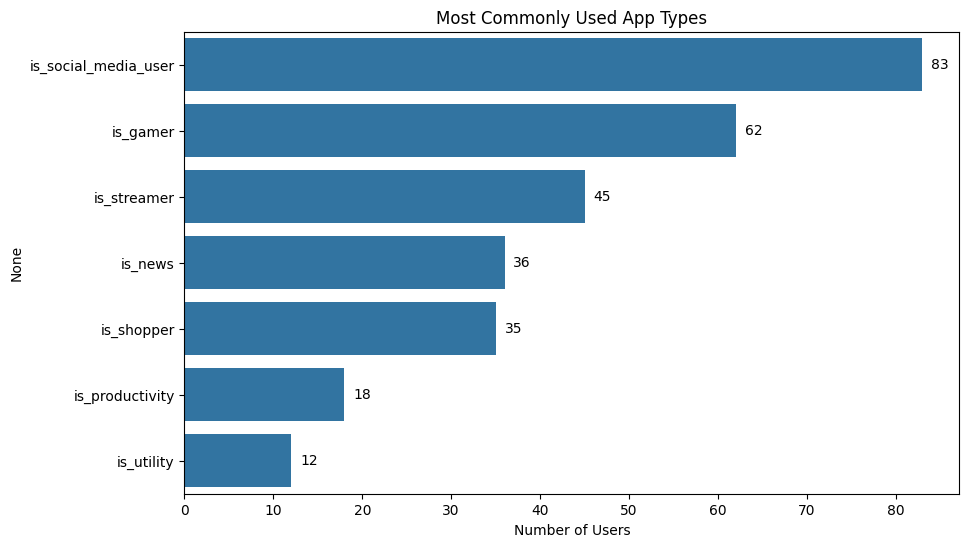

In [7]:
# Most commonly used apps
app_columns = ['is_gamer', 'is_social_media_user', 'is_shopper',
               'is_news', 'is_utility', 'is_streamer', 'is_productivity']

app_usage = df[app_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=app_usage.values, y=app_usage.index)

# Add data labels
for i, v in enumerate(app_usage.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.title('Most Commonly Used App Types')
plt.xlabel('Number of Users')
plt.show()

**ii. Demographic Analysis**

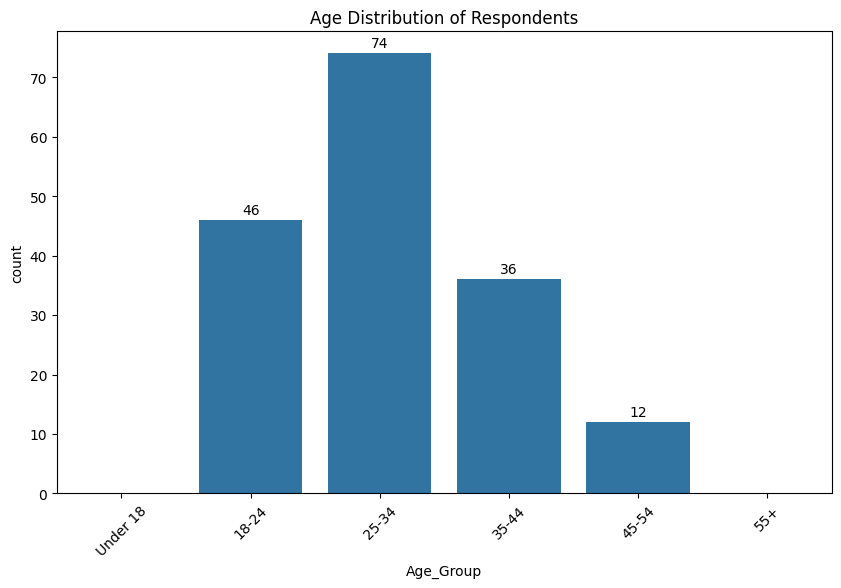

In [14]:
# Demographics Analysis
plt.figure(figsize=(10, 6))
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = df['Age_Code'].map(dict(zip(range(1, 7), age_labels)))  # map 1–6 to labels
ax = sns.countplot(data=df, x='Age_Group', order=age_labels)
# Add labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,     # x: center of the bar
            p.get_height() + 1,                # y: slightly above the bar
            str(int(p.get_height())),          # text: bar height (count)
            ha='center')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()

**iii. Descriptive Statistics**

In [17]:
# Core Variable Description
# Define columns for descriptive stats
desc_cols = [
    'Banner_Ads', 'Pop_up_Ads', 'Rewarded_Ads',
    'Satisfaction_Pop_up', 'Satisfaction_Banner', 'Satisfaction_Rewarded',
    'Engagement_Pop_up', 'Engagement_Rewarded', 'Engagement_Relevant'
]

# Calculate mean and standard deviation
descriptive_stats = df[desc_cols].agg(['mean', 'std']).T
descriptive_stats.columns = ['Mean', 'Standard Deviation']

print("\n--- Descriptive Statistics for Ad Metrics (1-5 Scale) ---")
print(descriptive_stats.round(3))


--- Descriptive Statistics for Ad Metrics (1-5 Scale) ---
                        Mean  Standard Deviation
Banner_Ads             3.810               1.009
Pop_up_Ads             3.363               0.938
Rewarded_Ads           3.054               1.473
Satisfaction_Pop_up    2.048               1.152
Satisfaction_Banner    3.470               1.038
Satisfaction_Rewarded  3.542               1.422
Engagement_Pop_up      2.095               1.159
Engagement_Rewarded    3.667               1.284
Engagement_Relevant    4.244               1.069


# **4. INFERENTIAL ANALYSIS**

**i. Test for Hypothesis**

In [21]:
print("--- 4A: ANOVA - Impact of Ad Frequency on Satisfaction ---")

# Run 3 ANOVAs (Satisfaction vs. its own Exposure)

# 1. Satisfaction with Pop-ups vs. Pop-up Frequency
model_pop_sat = ols('Satisfaction_Pop_up ~ C(Pop_up_Ads)', data=df).fit()
anova_pop_sat = sm.stats.anova_lm(model_pop_sat, typ=2)
print("\nANOVA: Satisfaction_Pop_up vs. Pop_up_Ads Frequency")
print(anova_pop_sat.round(4))

# 2. Satisfaction with Banners vs. Banner Frequency
model_ban_sat = ols('Satisfaction_Banner ~ C(Banner_Ads)', data=df).fit()
anova_ban_sat = sm.stats.anova_lm(model_ban_sat, typ=2)
print("\nANOVA: Satisfaction_Banner vs. Banner_Ads Frequency")
print(anova_ban_sat.round(4))

# 3. Satisfaction with Rewarded Ads vs. Rewarded Ad Frequency
model_rew_sat = ols('Satisfaction_Rewarded ~ C(Rewarded_Ads)', data=df).fit()
anova_rew_sat = sm.stats.anova_lm(model_rew_sat, typ=2)
print("\nANOVA: Satisfaction_Rewarded vs. Rewarded_Ads Frequency")
print(anova_rew_sat.round(4))

--- 4A: ANOVA - Impact of Ad Frequency on Satisfaction ---

ANOVA: Satisfaction_Pop_up vs. Pop_up_Ads Frequency
                 sum_sq     df         F  PR(>F)
C(Pop_up_Ads)  167.9178    4.0  127.4208     0.0
Residual        53.7012  163.0       NaN     NaN

ANOVA: Satisfaction_Banner vs. Banner_Ads Frequency
                 sum_sq     df        F  PR(>F)
C(Banner_Ads)  101.2381    3.0  70.3998     0.0
Residual        78.6131  164.0      NaN     NaN

ANOVA: Satisfaction_Rewarded vs. Rewarded_Ads Frequency
                   sum_sq     df        F  PR(>F)
C(Rewarded_Ads)  218.9474    4.0  75.1266     0.0
Residual         118.7610  163.0      NaN     NaN


**ii. Post-Hoc Analysis (Tukey's HSD)**

In [23]:
print("--- POST-HOC ANALYSIS (Tukey's HSD) ---")

# 1. Tukey's HSD for Satisfaction_Pop_up
print("\n1. Tukey's HSD: Satisfaction_Pop_up (DV) by Pop_up_Ads (Between)")
post_hoc_pop = pg.pairwise_tukey(data=df, dv='Satisfaction_Pop_up', between='Pop_up_Ads')
print("Available columns:", post_hoc_pop.columns.tolist())  # Debug: see actual column names
# Use the correct column names:
print(post_hoc_pop[['A', 'B', 'mean(A)', 'mean(B)', 'p-tukey', 'hedges']].round(4))

print("\n" + "="*50)

# 2. Tukey's HSD for Satisfaction_Banner
print("\n2. Tukey's HSD: Satisfaction_Banner (DV) by Banner_Ads (Between)")
post_hoc_banner = pg.pairwise_tukey(data=df, dv='Satisfaction_Banner', between='Banner_Ads')
print("Available columns:", post_hoc_banner.columns.tolist())  # Debug: see actual column names
# Use the correct column names:
print(post_hoc_banner[['A', 'B', 'mean(A)', 'mean(B)', 'p-tukey', 'hedges']].round(4))

print("\n" + "="*50)

# 3. Tukey's HSD for Satisfaction_Rewarded
print("\n3. Tukey's HSD: Satisfaction_Rewarded (DV) by Rewarded_Ads (Between)")
post_hoc_rewarded = pg.pairwise_tukey(data=df, dv='Satisfaction_Rewarded', between='Rewarded_Ads')
print("Available columns:", post_hoc_rewarded.columns.tolist())  # Debug: see actual column names
# Use the correct column names:
print(post_hoc_rewarded[['A', 'B', 'mean(A)', 'mean(B)', 'p-tukey', 'hedges']].round(4))

--- POST-HOC ANALYSIS (Tukey's HSD) ---

1. Tukey's HSD: Satisfaction_Pop_up (DV) by Pop_up_Ads (Between)


/usr/local/lib/python3.12/dist-packages/pingouin/effsize.py:802: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / dof)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Available columns: ['A', 'B', 'mean(A)', 'mean(B)', 'diff', 'se', 'T', 'p-tukey', 'hedges']
   A  B  mean(A)  mean(B)  p-tukey  hedges
0  1  2   5.0000   3.9062   0.3342     NaN
1  1  3   5.0000   2.0000   0.0000     NaN
2  1  4   5.0000   1.3509   0.0000     NaN
3  1  5   5.0000   1.0000   0.0000     NaN
4  2  3   3.9062   2.0000   0.0000  2.8657
5  2  4   3.9062   1.3509   0.0000  5.3235
6  2  5   3.9062   1.0000   0.0000  9.2211
7  3  4   2.0000   1.3509   0.0000  0.9838
8  3  5   2.0000   1.0000   0.0000  1.4803
9  4  5   1.3509   1.0000   0.1477  0.7719


2. Tukey's HSD: Satisfaction_Banner (DV) by Banner_Ads (Between)
Available columns: ['A', 'B', 'mean(A)', 'mean(B)', 'diff', 'se', 'T', 'p-tukey', 'hedges']
   A  B  mean(A)  mean(B)  p-tukey  hedges
0  2  3   3.8667   4.3898   0.0478 -0.8051
1  2  4   3.8667   3.2432   0.0194  0.8127
2  2  5   3.8667   2.5614   0.0000  2.0501
3  3  4   4.3898   3.2432   0.0000  1.5465
4  3  5   4.3898   2.5614   0.0000  2.7408
5  4  5   3.2432  

**iii. Multiple Regression**

In [24]:
# --- 4B: Multiple Regression - Predicting Ad Relevance ---

print("\n--- OLS Regression Model 1: Predicting Engagement_Relevant ---")

# Define all key predictors: Ad Frequencies + App Types (Dummy Variables)
# Note: Age_Code is ordinal, but often used as interval/ratio in regression, or can be converted to dummies
predictors = [
    'Banner_Ads', 'Pop_up_Ads', 'Rewarded_Ads',  # Ad Frequencies
    'is_gamer', 'is_social_media_user', 'is_shopper', 'is_news', # App Types
    'Age_Code' # Demographics
]

X_rel = df[predictors]
y_rel = df['Engagement_Relevant']

# Add the intercept term
X_rel = sm.add_constant(X_rel)

# Run the OLS model
model_relevant = sm.OLS(y_rel, X_rel).fit()

# Print the detailed summary
print(model_relevant.summary())

# --- Additional Regression Models for Comprehensive Analysis ---
# You should also run models to predict other key dependent variables, such as:

# Model 2: Predict Satisfaction_Rewarded (The most accepted ad type)
# y_rew_sat = df['Satisfaction_Rewarded']
# model_rew_sat = sm.OLS(y_rew_sat, X_rel).fit()
# print("\n--- OLS Regression Model 2: Predicting Satisfaction_Rewarded ---")
# print(model_rew_sat.summary())

# Model 3: Predict Satisfaction_Pop_up (The most rejected ad type)
# y_pop_sat = df['Satisfaction_Pop_up']
# model_pop_sat = sm.OLS(y_pop_sat, X_rel).fit()
# print("\n--- OLS Regression Model 3: Predicting Satisfaction_Pop_up ---")
# print(model_pop_sat.summary())


--- OLS Regression Model 1: Predicting Engagement_Relevant ---
                             OLS Regression Results                            
Dep. Variable:     Engagement_Relevant   R-squared:                       0.809
Model:                             OLS   Adj. R-squared:                  0.799
Method:                  Least Squares   F-statistic:                     83.97
Date:                 Mon, 29 Sep 2025   Prob (F-statistic):           3.95e-53
Time:                         16:22:32   Log-Likelihood:                -110.27
No. Observations:                  168   AIC:                             238.5
Df Residuals:                      159   BIC:                             266.7
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------